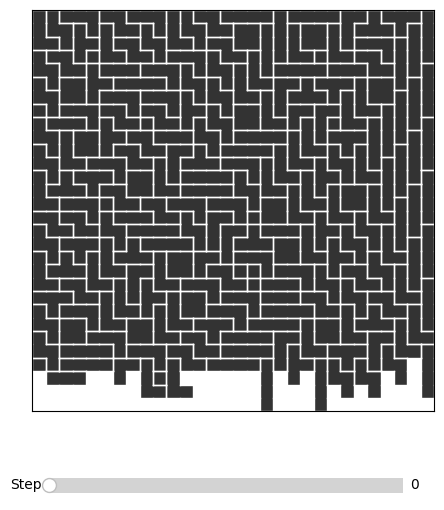

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from matplotlib.widgets import Slider

# Load all grid data from the file, handling multiple grids separated by empty lines
def load_all_grids(filename):
    with open(filename, 'r') as file:
        raw_grids = file.read().strip().split('\n\n')  # Split grids by empty lines
        grids = [np.array([list(map(int, line.split())) for line in grid.split('\n')]) for grid in raw_grids]
    return grids

# Function to check if a grid cell is connected to its neighbors (for black-and-white mode)
def is_connected(grid, row, col):
    connected = []
    if row > 0 and grid[row, col] == grid[row - 1, col]:
        connected.append('top')
    if row < grid.shape[0] - 1 and grid[row, col] == grid[row + 1, col]:
        connected.append('bottom')
    if col > 0 and grid[row, col] == grid[row, col - 1]:
        connected.append('left')
    if col < grid.shape[1] - 1 and grid[row, col] == grid[row, col + 1]:
        connected.append('right')
    return connected

# Visualize the grid with a slider to move through states
def visualize_grid_evolution(grids):
    mm_per_inch = 25.4  # 1 inch = 25.4 mm
    element_size_mm = 5  # Desired size of each grid element in millimeters
    
    # Calculate figure size in inches
    grid_shape = grids[0].shape
    figsize = (grid_shape[1] * element_size_mm / mm_per_inch, grid_shape[0] * element_size_mm / mm_per_inch)
    
    fig, ax = plt.subplots(figsize=figsize)
    plt.subplots_adjust(bottom=0.2)  # Make space for the slider

    rects = []
    for row in range(grid_shape[0]):
        for col in range(grid_shape[1]):
            rect = patches.Rectangle((col, row), 1, 1, facecolor='none', edgecolor='none')
            ax.add_patch(rect)
            rects.append(rect)
    
    def update_grid(step):
        grid = grids[step]
        for row in range(grid_shape[0]):
            for col in range(grid_shape[1]):
                if grid[row, col] != 0:
                    connected = is_connected(grid, row, col)
                    rect = rects[row * grid_shape[1] + col]
                    rect.set_facecolor('#333')
                    rect.set_edgecolor('none')

                    if 'top' not in connected:
                        ax.plot([col, col + 1], [row, row], color='white', lw=1)
                    if 'bottom' not in connected:
                        ax.plot([col, col + 1], [row + 1, row + 1], color='white', lw=1)
                    if 'left' not in connected:
                        ax.plot([col, col], [row, row + 1], color='white', lw=1)
                    if 'right' not in connected:
                        ax.plot([col + 1, col + 1], [row, row + 1], color='white', lw=1)
                else:
                    rects[row * grid_shape[1] + col].set_facecolor('none')

    # Ensure the aspect ratio is equal
    ax.set_aspect('equal')
    ax.set_xlim(0, grid_shape[1])
    ax.set_ylim(0, grid_shape[0])
    ax.invert_yaxis()
    
    # Disable the default grid and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

    # Remove axes spines
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Add slider
    ax_slider = plt.axes([0.2, 0.05, 0.6, 0.05], facecolor='lightgoldenrodyellow')
    slider = Slider(ax_slider, 'Step', 0, len(grids) - 1, valinit=0, valstep=1)

    # Update function for the slider
    def update(val):
        step = int(slider.val)
        update_grid(step)
        fig.canvas.draw_idle()

    slider.on_changed(update)

    # Initialize the display with the first grid
    update_grid(0)
    plt.show()

if __name__ == "__main__":
    # Specify the filename directly
    filename = "output/947da0ac58e0ed56b8151ef13ede6d3f7cd36ffa_30x30_grid_output_intermediate.txt"

    # Load all grids data
    grids = load_all_grids(filename)

    # Visualize the grid evolution
    visualize_grid_evolution(grids)
